In [2]:
import requests
import pandas as pd
from config import api_key

In [3]:
file_format = 'json'

url = f'https://developer.nrel.gov/api/alt-fuel-stations/v1.{file_format}?api_key={api_key}'

stations_data = requests.get(url).json()

In [4]:
stations = stations_data['fuel_stations']

In [5]:
stations_df = pd.DataFrame.from_dict(stations)
stations_df.set_index('id', inplace=True)

stations_df.head()

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,maximum_vehicle_class,open_date,...,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,federal_agency,ev_network_ids
id,,,,,,,,,,,,,,,,,,,,,
17,private,None,None,None,2023-04-06,None,CNG,Private,MD,2010-12-01,...,None,None,None,None,None,None,Privé,None,NaN,NaN
45,private,None,GOVERNMENT,None,2024-02-12,None,CNG,Private - Government only,LD,1996-12-15,...,None,None,None,None,None,None,Privé - Réservé au gouvernement,None,NaN,NaN
64,private,None,None,None,2023-12-13,None,CNG,Private,HD,1997-01-01,...,None,None,None,None,None,None,Privé,None,NaN,NaN
73,public,24 hours daily,CREDIT_CARD_ALWAYS,CREDIT M V Voyager,2024-04-14,None,CNG,Public - Credit card at all times,MD,1997-01-01,...,None,None,None,None,None,None,Public - Carte de crédit en tout temps,None,NaN,NaN
81,public,24 hours daily; call 866-809-4869 for Clean En...,CREDIT_CARD_ALWAYS,A CleanEnergy Comdata D FuelMan M V Voyager Wr...,2023-09-14,None,CNG,Public - Credit card at all times,MD,1996-11-15,...,None,None,None,None,None,None,Public - Carte de crédit en tout temps,None,NaN,NaN


In [6]:
stations_cleaned_df = stations_df[['date_last_confirmed', 
                                    'expected_date', 
                                    'open_date',
                                    'updated_at',
                                    'fuel_type_code', 
                                    'status_code', 
                                    'access_code', 
                                    'facility_type',
                                    'owner_type_code', 
                                    'ev_workplace_charging',
                                    'ev_network', 
                                    'ev_level1_evse_num',
                                    'ev_level2_evse_num',
                                    'ev_dc_fast_num',
                                    'ev_connector_types',
                                    'ev_pricing',
                                    'ev_renewable_source',
                                    'geocode_status',
                                    'latitude',
                                    'longitude',
                                    'street_address',
                                    'city',
                                    'state',
                                    'zip',
                                    'country'
                                    ]]

stations_cleaned_df.head()

,date_last_confirmed,expected_date,open_date,updated_at,fuel_type_code,status_code,access_code,facility_type,owner_type_code,ev_workplace_charging,...,ev_pricing,ev_renewable_source,geocode_status,latitude,longitude,street_address,city,state,zip,country
id,,,,,,,,,,,,,,,,,,,,,
17,2023-04-06,None,2010-12-01,2024-01-31T22:07:01Z,CNG,E,private,STANDALONE_STATION,T,None,...,None,None,200-9,32.367916,-86.267021,2951 Chestnut St,Montgomery,AL,36107,US
45,2024-02-12,None,1996-12-15,2024-02-12T21:24:44Z,CNG,E,private,FLEET_GARAGE,LG,None,...,None,None,200-8,33.821911,-84.367461,2424 Piedmont Rd NE,Atlanta,GA,30324,US
64,2023-12-13,None,1997-01-01,2024-01-31T22:07:01Z,CNG,E,private,STANDALONE_STATION,P,None,...,None,None,200-9,33.760256,-84.543822,270 Marvin Miller Dr,Atlanta,GA,30336,US
73,2024-04-14,None,1997-01-01,2024-04-14T22:11:34Z,CNG,E,public,UTILITY,T,None,...,None,None,200-9,35.362213,-94.375338,2100 S Waldron Rd,Fort Smith,AR,72903,US
81,2023-09-14,None,1996-11-15,2024-01-31T22:07:01Z,CNG,E,public,AIRPORT,SG,None,...,None,None,GPS,42.374706,-71.026549,1000 Cottage St Ext,East Boston,MA,02128,US


<Axes: xlabel='status_code', ylabel='fuel_type_code'>

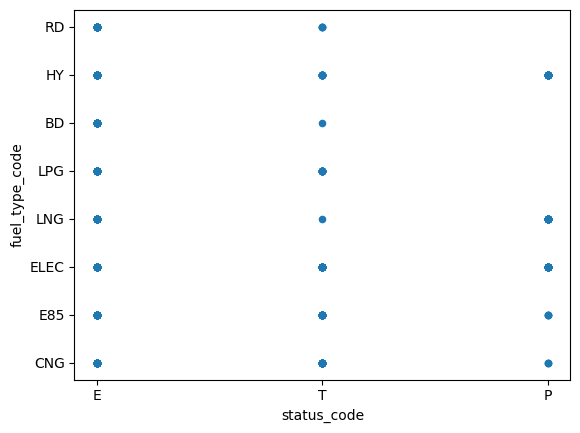

In [10]:
stations_cleaned_df.plot(x='status_code', y='fuel_type_code', kind='scatter')